<a href="https://colab.research.google.com/github/mbaroja/TFM/blob/main/SpectralClustering_230617_1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import rbf_kernel

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import linkage, dendrogram
import networkx as nx
from sklearn.manifold import TSNE
import seaborn as sns

# Descarga de Datos

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned.csv', delimiter=';')
#data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned_only_avgcolumns.csv', delimiter=';')
#data = pd.read_csv('https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned_without_avgcolumns.csv', delimiter=';')

# Preprocesado de Datos

In [ ]:
#Preprocesado de datos ya que Spectral Clustering requiere datos numéricos para calcular la matriz de afinidad y realizar el clustering

#identificar las columnas que contienen valores de texto en el conjunto de datos
data_text = data.select_dtypes(include='object')
# aplicar la codificación one-hot utilizando el método get_dummies de Pandas para convertir esas columnas en columnas numéricas
data_encoded = pd.get_dummies(data_text)

In [ ]:
#una vez que preprocesados los datos, combinar las columnas numéricas procesadas con el resto del conjunto de datos.
data_numeric = data.select_dtypes(exclude='object')
data_processed = pd.concat([data_numeric, data_encoded], axis=1)

# Crear matriz de características (feature matrix)

In [ ]:
# Crear una matriz de características (feature matrix) a partir de los datos:
X = data_processed.values

# Aplicar el algoritmo de clustering espectral

In [ ]:
# Experimentar con diferentes configuraciones para obtener resultados óptimos:

#0. Calcular la matriz de afinidad según distancia euclideana (A) o RBF (B)

#1. n_clusters: Este parámetro determina el número de clusters que se deben generar.
#    Probar diferentes valores para encontrar el número óptimo de clusters en los datos. Usar
#2. assign_labels: Este parámetro determina cómo se asignan las etiquetas a los clusters.
#   'kmeans' para utilizar el algoritmo K-means o
#   'discretize' para discretizar los valores propios (eigenvalues) de la matriz de afinidad.
#3. random_state: Este parámetro controla la reproducibilidad de los resultados.
#    Fijar un valor específico para obtener los mismos resultados cada vez que se ejecute el algoritmo.

#Además,se ajustarán otros parámetros según las necesidades:

#gamma: Si se utiliza una matriz de afinidad basada en RBF, se puede ajustar el valor de gamma para controlar la escala de la función de base radial.
#Un valor más alto de gamma puede llevar a una asignación más precisa, pero también puede hacer que el algoritmo sea más sensible al ruido.

#eigen_solver: Este parámetro controla el algoritmo utilizado para calcular los valores y vectores propios (eigenvalues y eigenvectors)
#de la matriz de afinidad. Probar diferentes opciones, como 'arpack' o 'lobpcg', para obtener resultados diferentes.


# A) Aplicar el algoritmo de clustering espectral calculando la matriz de afinidad utilizando la DISTANCIA EUCLIDEANA

In [ ]:
#utilizar la función pairwise_distances de scikit-learn para calcular la matriz de afinidad utilizando la distancia euclidiana entre las muestras en X
affinity_matrix_euclidean = pairwise_distances(X, metric='euclidean')

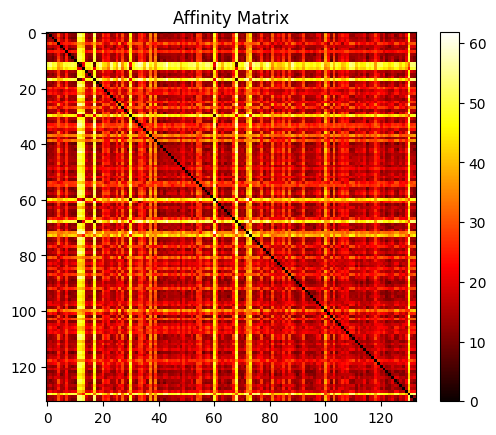

In [ ]:
#Visualización de matriz de similitud
#Esto puede proporcionar información sobre las relaciones de similitud entre las muestras
plt.imshow(affinity_matrix_euclidean, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Affinity Matrix')
plt.show()

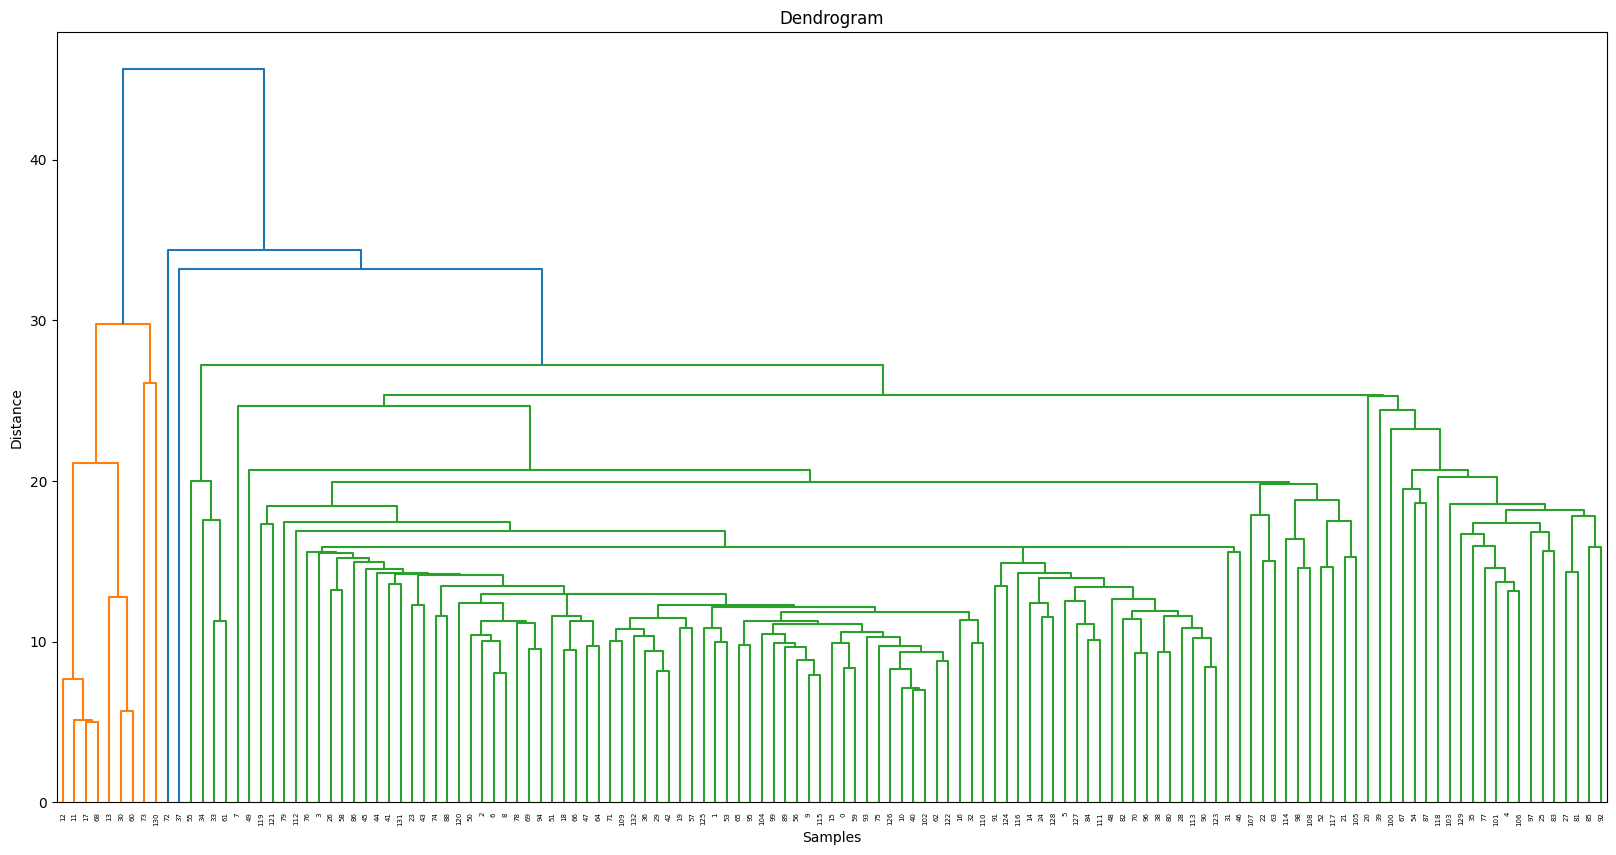

In [ ]:
#Visualización de gráfico de dendrograma

# Calcular la matriz de enlace jerárquico
Z = linkage(X, method='average', metric='euclidean')

# Dibujar el dendrograma
plt.figure(figsize=(20, 10))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

## A.1) matriz de afinidad=distancia euclidiana y assign_labels=discretize

## A.1.1) Clustering1: matriz de afinidad euclideana - discretize - n_clusters=4

In [ ]:
n_clusters = 4    #número de clusters que se desea obtener
spectral_clustering1 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels1 = spectral_clustering1.fit_predict(affinity_matrix_euclidean)
labels1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

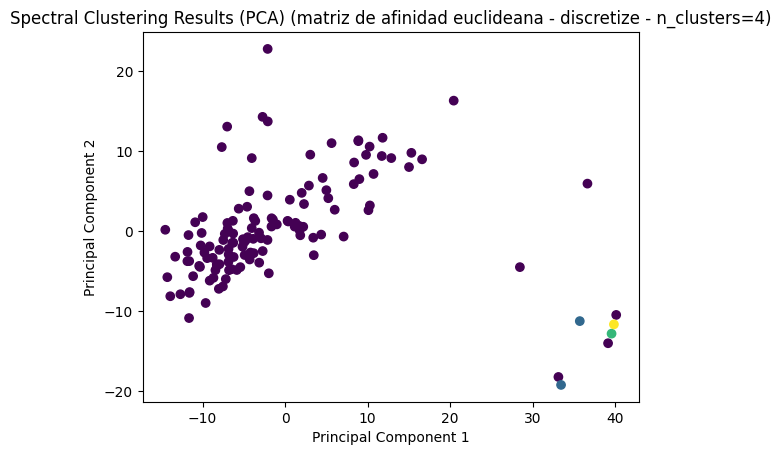

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels1)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels1)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels1)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - discretize - n_clusters=4)')
    plt.show()

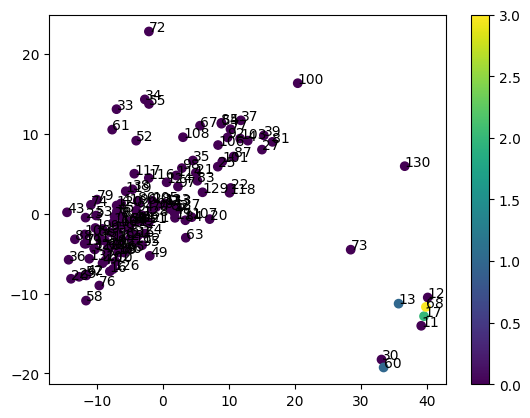

In [ ]:
# X_pca[:, 0] son los valores en el eje x
# X_pca[:, 1] son los valores en el eje y
# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels1)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels1):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

In [ ]:
# Aplicar PCA al conjunto de datos

pca = PCA()

pca.fit(X)

# Obtener las componentes principales y su varianza explicada

components = pca.components_

explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster

important_attributes = []

for cluster in range(spectral_clustering1.n_clusters):

    cluster_indices = np.where(labels1 == cluster)[0]

    cluster_data = data_processed.iloc[cluster_indices]

    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)

    important_attributes.append(np.argsort(-np.abs(cluster_scores)))


# Nombres de los campos

column_names = data_processed.columns.tolist()


# Imprimir los atributos más importantes por clúster

for cluster, attributes in enumerate(important_attributes):

    print(f"Cluster {cluster+1}:")

    for attribute in attributes[:5]:  # Mostrar los 5 atributos más importantes

        attribute_name = column_names[attribute]

        attribute_mean = np.mean(data_processed.iloc[np.where(labels1 == cluster)[0], attribute])

        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")




Cluster 1:
- Atributo n. 1: V1 (Media: 4.271317829457364)
- Atributo n. 4: SA1 (Media: 4.255813953488372)
- Atributo n. 3: V3 (Media: 3.5813953488372094)
- Atributo n. 13: SF1 (Media: 3.302325581395349)
- Atributo n. 2: V2 (Media: 4.170542635658915)
Cluster 2:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 4: SA1 (Media: 4.0)
- Atributo n. 7: SI0 (Media: 4.5)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 11: SP2 (Media: 3.0)
Cluster 3:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 5.0)
- Atributo n. 13: SF1 (Media: 4.0)
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 12: SP3 (Media: 3.0)
Cluster 4:
- Atributo n. 2: V2 (Media: 4.0)
- Atributo n. 3: V3 (Media: 3.0)
- Atributo n. 1: V1 (Media: 4.0)
- Atributo n. 13: SF1 (Media: 4.0)
- Atributo n. 14: SF2 (Media: 4.0)


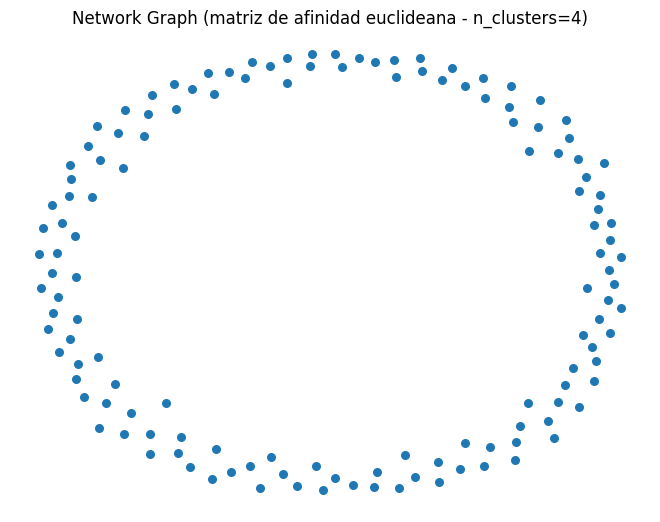

In [ ]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 4   #ajustar el valor de umbral para controlar la cantidad de conexiones en el gráfico de red

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_euclidean[i, j] < umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad euclideana - n_clusters=4)')
plt.show()


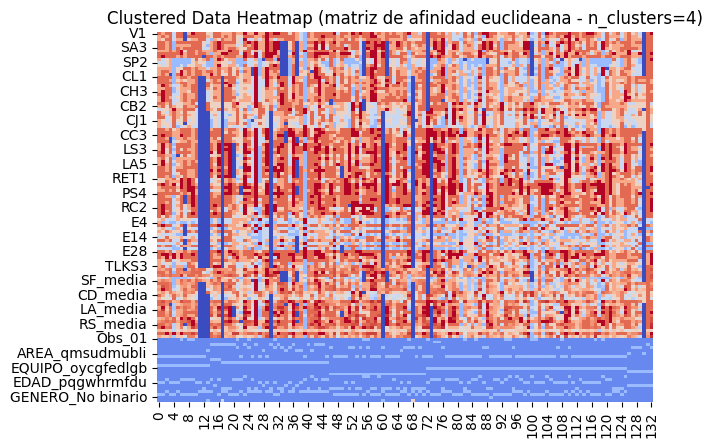

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labels1

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=4)')
plt.show()


## A.1.2) Clustering2:  matriz de afinidad euclideana - discretize - n_clusters=97

In [ ]:
n_clusters = 97    #número de clusters que se desea obtener; porque son 97 preguntas
spectral_clustering2 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels2 = spectral_clustering2.fit_predict(affinity_matrix_euclidean)
labels2

array([37, 68, 83, 66, 88, 78, 29, 92, 51, 28, 20, 35, 50, 69, 79, 15, 64,
        4, 75, 57, 52, 14, 53, 92, 19, 14, 22,  9, 52, 72,  5, 62, 13, 70,
       38, 78, 56, 79, 61, 77,  8, 24, 17, 25, 10, 31, 41,  1, 11, 84, 74,
       65, 34, 73, 11,  1, 12, 45,  0, 55, 44,  6, 18, 80,  7, 54, 60,  3,
       21, 63, 10, 30, 38, 38, 66, 46, 73, 23, 91, 24,  2, 39, 87,  3, 24,
       53, 58, 79, 26, 58, 22,  1, 77, 48, 23, 68, 43, 47,  7, 80, 84, 16,
       27, 29, 49,  9, 31, 14, 67, 42, 40, 41, 34, 55, 79, 36, 47, 67, 79,
       78, 62, 86, 26, 33, 68, 82, 32, 39, 59, 77, 47, 71, 11])

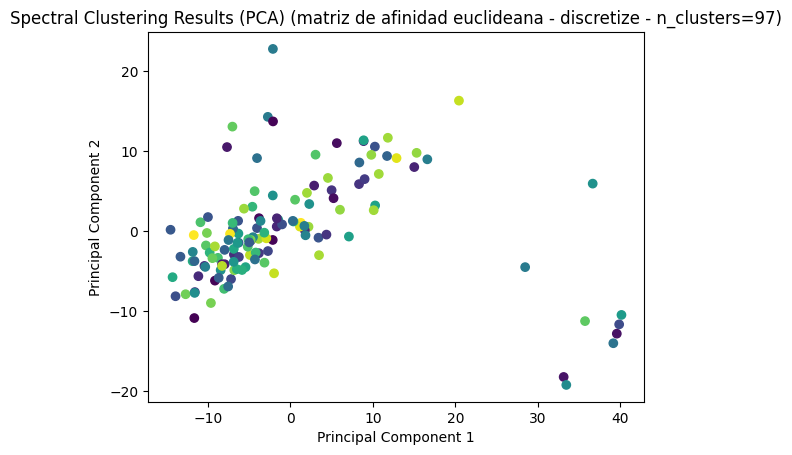

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels2)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels2)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - discretize - n_clusters=97)')
    plt.show()

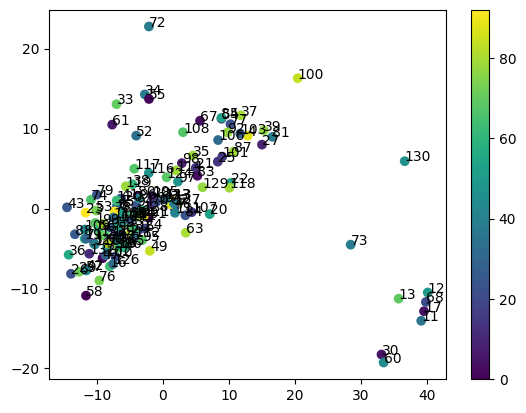

In [ ]:
# X_pca[:, 0] son los valores en el eje x
# X_pca[:, 1] son los valores en el eje y
# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels2):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

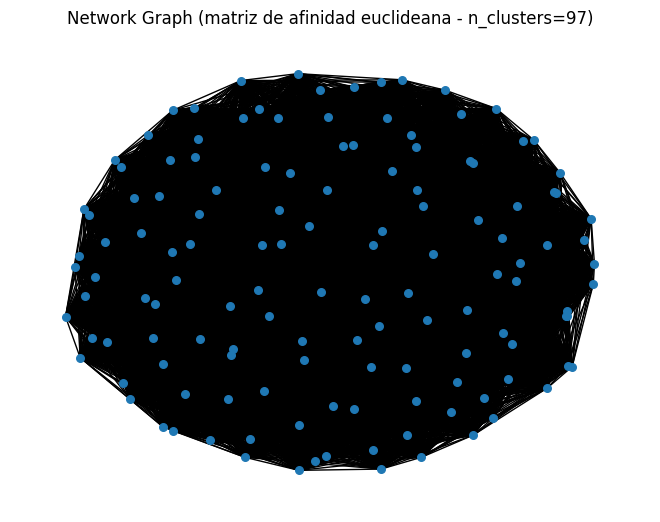

In [ ]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 97   #ajustar el valor de umbral para controlar la cantidad de conexiones en el gráfico de red

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_euclidean[i, j] < umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

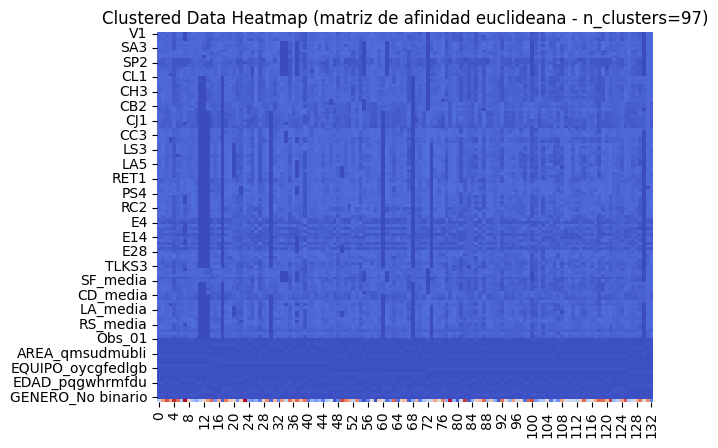

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labels2

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

## A.1.3) Clustering3:  matriz de afinidad euclideana - discretize - n_clusters=27

In [ ]:
n_clusters = 27    #número de clusters que se desea obtener; porque son 27 áreas
spectral_clustering3 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels3 = spectral_clustering3.fit_predict(affinity_matrix_euclidean)
labels3

array([12, 17, 23, 17, 18, 11, 26, 17, 22, 26, 24,  2, 19, 21, 13, 18,  7,
        8, 12, 25, 11, 20, 11, 20, 18, 13, 17, 11, 11,  3,  4,  3,  6, 26,
       17,  7, 10, 13,  0, 13, 15, 13, 23,  7, 11, 13, 11, 20, 23, 13, 13,
        3, 23,  0, 11, 13, 24,  9,  0, 25, 16,  7, 17, 20,  6, 18,  1,  7,
       14, 10, 25,  0, 17, 13, 12, 23,  1, 13,  3, 20, 11, 13, 11, 17, 17,
       11,  1, 21, 26,  3, 11, 17, 17, 18, 25, 10,  6, 26, 13, 25, 13,  7,
       25, 20, 18, 17, 13, 23, 20, 13,  1, 20, 13, 25, 20,  5, 20, 11, 20,
       23, 20, 13,  1, 18, 11, 12, 22, 20, 23, 11, 16, 24, 17])

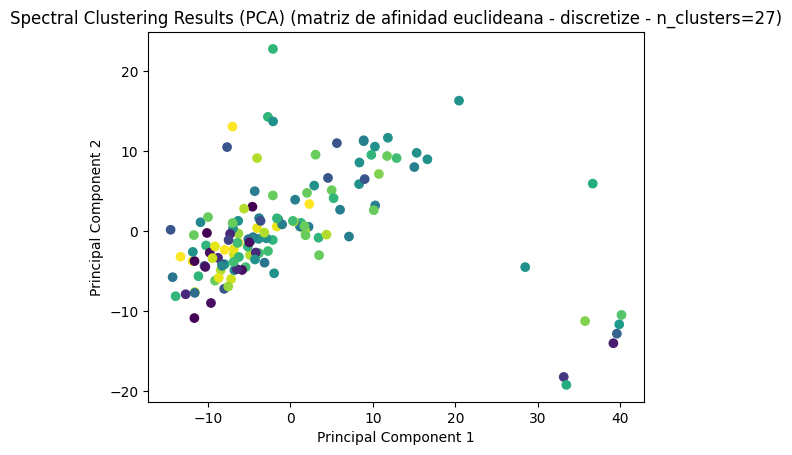

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels3)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels3)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - discretize - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels3)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - discretize - n_clusters=27)')
    plt.show()

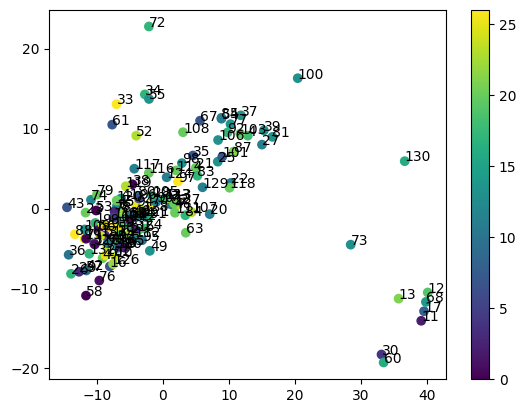

In [ ]:
# X_pca[:, 0] son los valores en el eje x
# X_pca[:, 1] son los valores en el eje y
# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels3)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels3):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

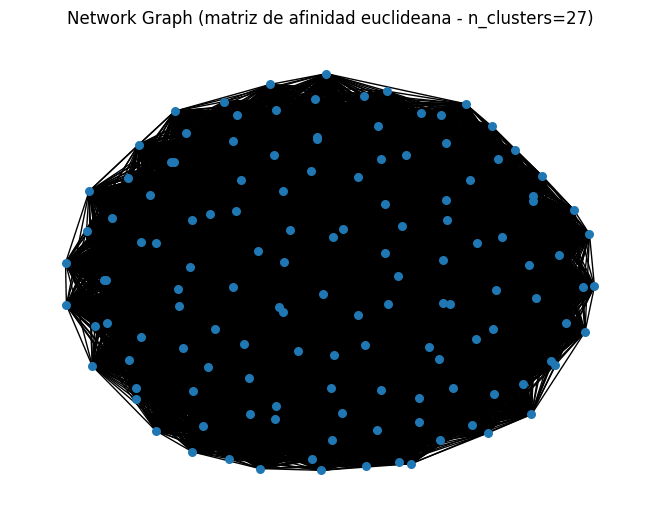

In [ ]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 97   #ajustar el valor de umbral para controlar la cantidad de conexiones en el gráfico de red

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_euclidean[i, j] < umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad euclideana - n_clusters=27)')
plt.show()

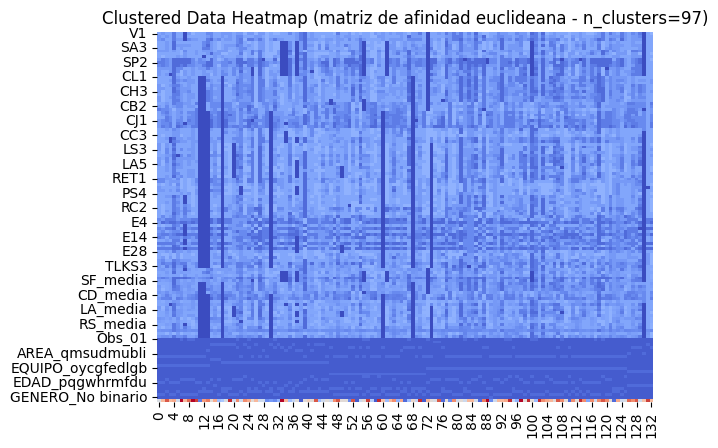

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labels3

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

## A.2) matriz de afinidad=distancia euclidiana y assign_labels=kmeans

## A.2.1) Clustering4:  matriz de afinidad euclideana - kmeans - n_clusters=4

In [ ]:
n_clusters = 4    #número de clusters que se desea obtener
spectral_clustering4 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels4 = spectral_clustering4.fit_predict(affinity_matrix_euclidean)
labels4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

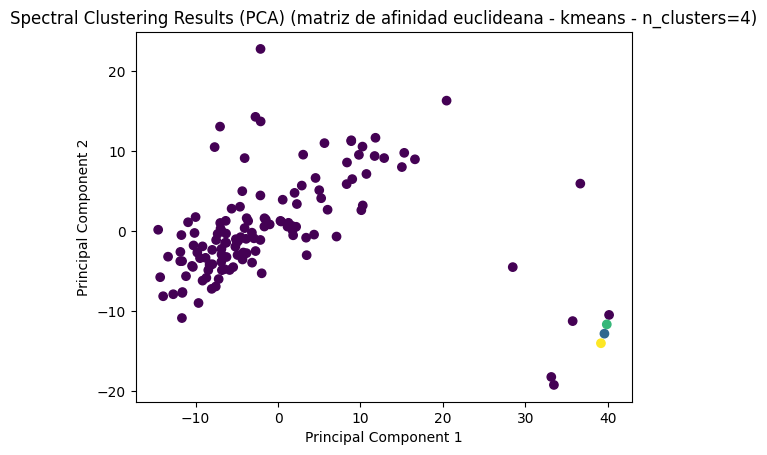

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels4)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels4)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels4)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - kmeans - n_clusters=4)')
    plt.show()

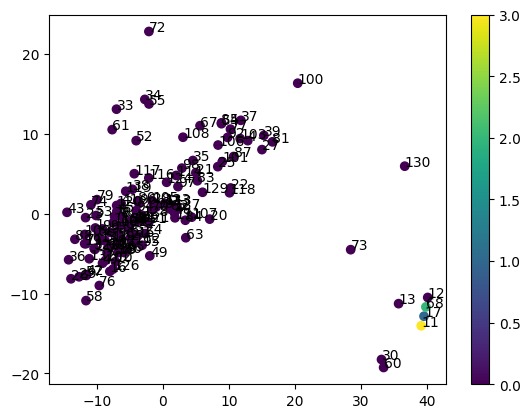

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels4)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels4):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

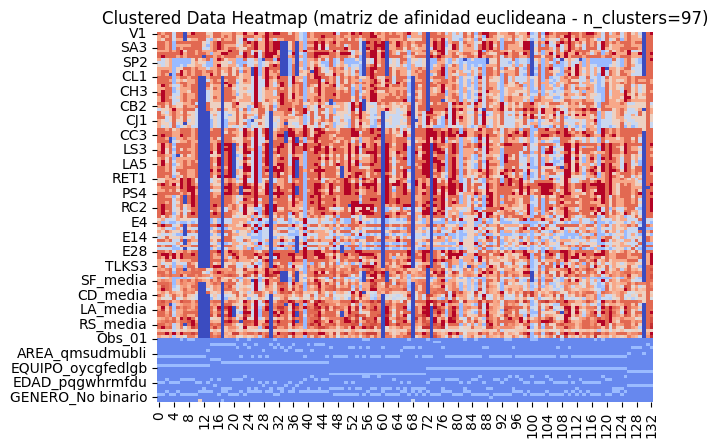

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labels4

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

## A.2.2) Clustering5:  matriz de afinidad euclideana - kmeans - n_clusters=97

In [ ]:
n_clusters = 97    #número de clusters que se desea obtener; porque son 97 preguntas
spectral_clustering5 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels5 = spectral_clustering5.fit_predict(affinity_matrix_euclidean)
labels5

array([18, 60, 24,  4, 87, 82, 46,  6, 27, 20, 31,  4,  4,  4, 68,  2, 13,
        4,  7, 69,  0, 10,  4,  6, 63,  6, 90,  4, 53, 86,  4, 72, 41,  4,
        4,  4, 55,  4, 58,  6, 19, 22, 56, 75, 57, 66,  6, 91, 81,  6, 38,
       78, 94, 49,  4,  6, 37, 64, 33, 26,  4,  1, 12, 84, 62, 28, 51,  6,
        4, 17,  9, 14,  4,  4, 70, 42,  4, 92,  3, 73, 29,  4, 43, 85, 65,
       79,  4,  4, 89, 25, 11, 71, 95, 50, 47, 48, 16, 80, 67, 21,  6, 59,
        5,  4, 40, 83,  6,  6,  6, 77, 34, 15,  6, 74,  4,  8, 76, 88, 93,
       96, 23, 45, 36, 32, 52, 44, 30, 61, 39,  4,  4, 54, 35],
      dtype=int32)

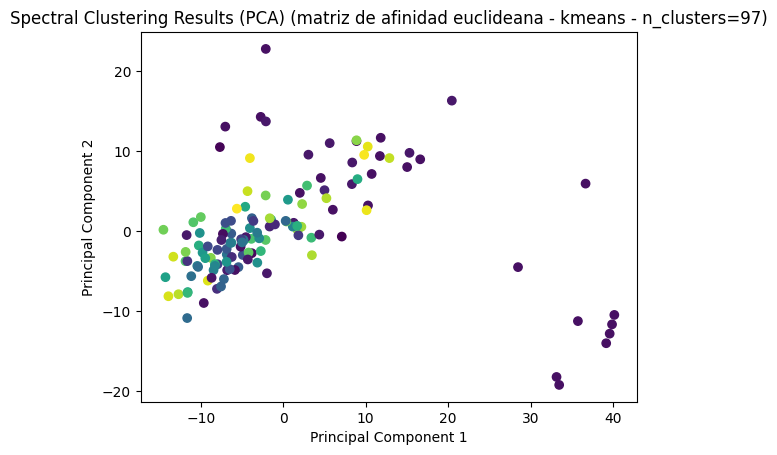

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels5)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad euclideana - kmeans - n_clusters=97)')
    plt.show()

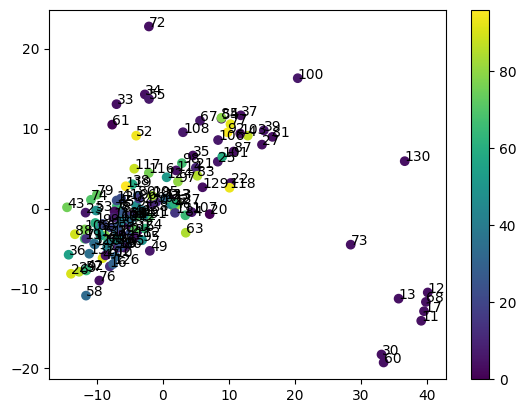

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels5)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels5):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

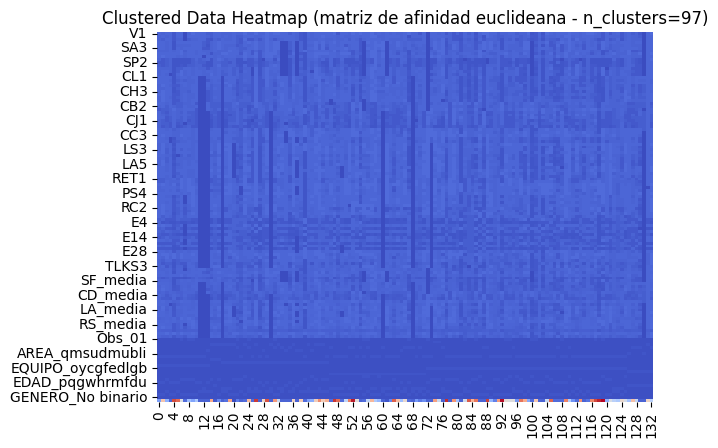

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labels5

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

## A.2.3) Clustering6: matriz de afinidad euclideana - kmeans - n_clusters=27

In [ ]:
n_clusters = 27    #número de clusters que se desea obtener; porque son 97 preguntas
spectral_clustering6 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
# se aplica el método fit_predict para obtener las etiquetas de cluster asignadas a cada muestra
labels6 = spectral_clustering6.fit_predict(affinity_matrix_euclidean)
labels6

array([ 8,  1,  0,  2,  2,  2,  1,  2, 25, 14, 15,  9, 18,  2,  2, 16,  2,
       26,  5, 16,  2,  2,  2,  2, 16,  2,  1,  2,  2, 17,  2,  2,  7,  1,
        2,  2, 12,  2,  2,  2,  6,  2, 13,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2, 24,  2,  2,  1, 23,  0,  5,  2,  2,  1,  2, 20, 16,  2,  2,
        2,  5,  2,  3,  2,  2,  2,  0,  2,  2, 16,  2, 21,  2,  2,  2,  1,
        2,  2,  2,  2,  2, 21,  1,  2,  1,  0,  5,  2,  2,  2, 16,  2,  2,
       11,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2, 10,  2,  2,  2,
        2, 16,  2,  4, 19,  2,  2, 22,  2,  0,  2,  2,  2,  1],
      dtype=int32)

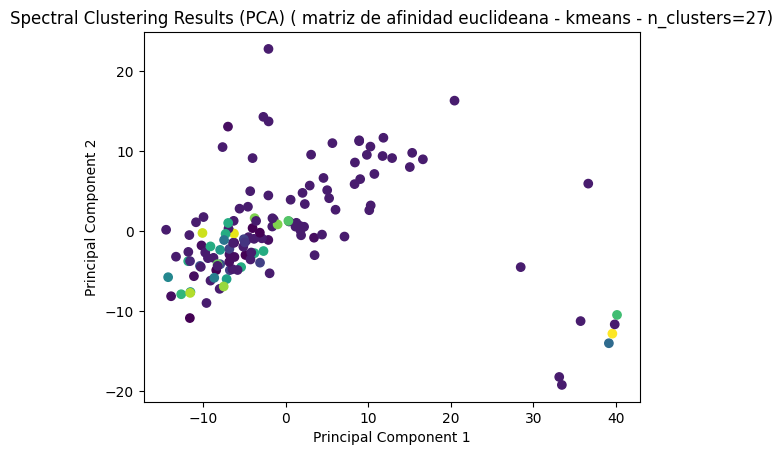

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labels6)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad euclideana - kmeans - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels6)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results ( matriz de afinidad euclideana - kmeans - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels6)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) ( matriz de afinidad euclideana - kmeans - n_clusters=27)')
    plt.show()

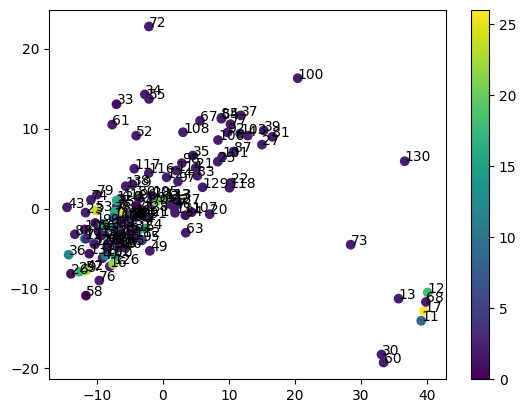

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels6)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labels6):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

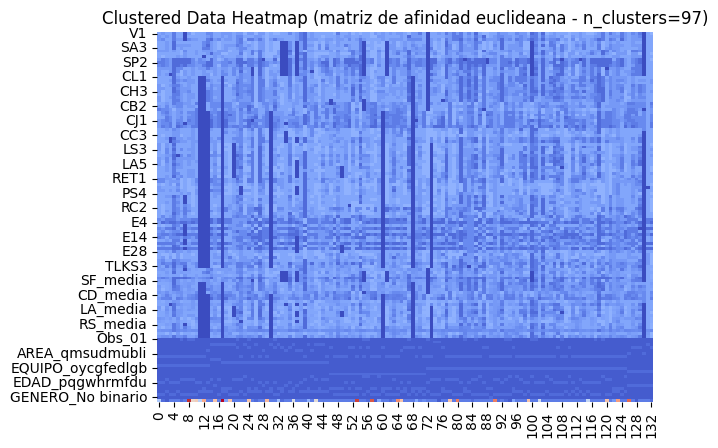

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labels6

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

# B) Aplicar el algoritmo de clustering espectral calculando la matriz de afinidad utilizando RBF

In [ ]:
affinity_matrix_rbf = rbf_kernel(X, gamma=0.1)  #se recomienda probar diferentes valores de gamma en un rango amplio, como [0.001, 0.01, 0.1, 1, 10]

# B.1)  matriz de afinidad=RBF y assign_labels=discretize

## B.1.1) Clustering7: matriz de afinidad RBF - discretize - n_clusters=4

In [ ]:
n_clusters = 4
spectral_clustering7 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_7 = spectral_clustering7.fit_predict(affinity_matrix_rbf)
labelsRBF_7

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 3, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0])

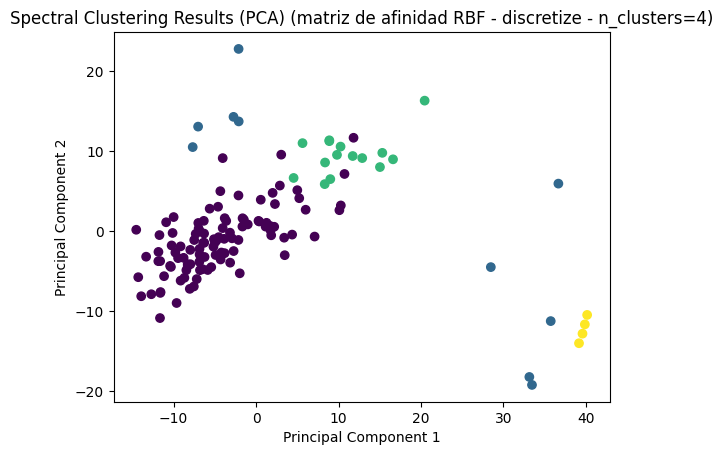

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_7)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_7)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_7)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - discretize - n_clusters=4)')
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels    plt.show()

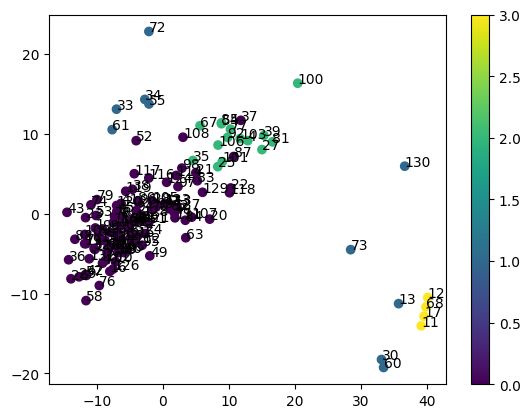

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_7)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_7):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

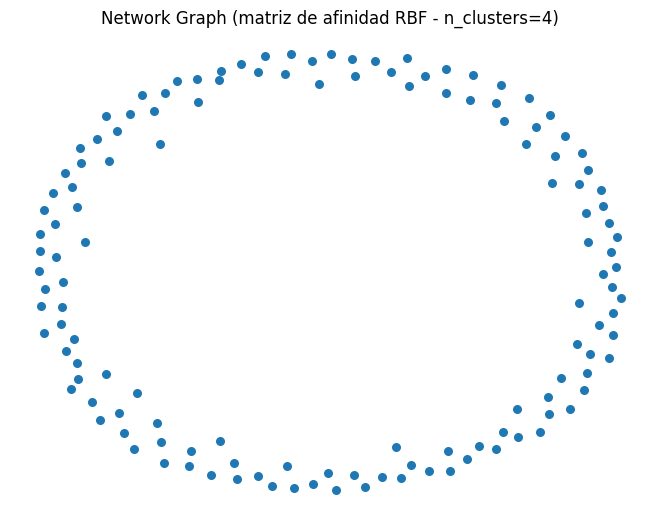

In [ ]:
#Visualización de gráfico de red (Network graph)
#Esto puede revelar patrones de conectividad entre los clústeres
#NO DEPENDE DEL PARÁMETRO assign_labels

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 4

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_rbf[i, j] > umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad RBF - n_clusters=4)')
plt.show()


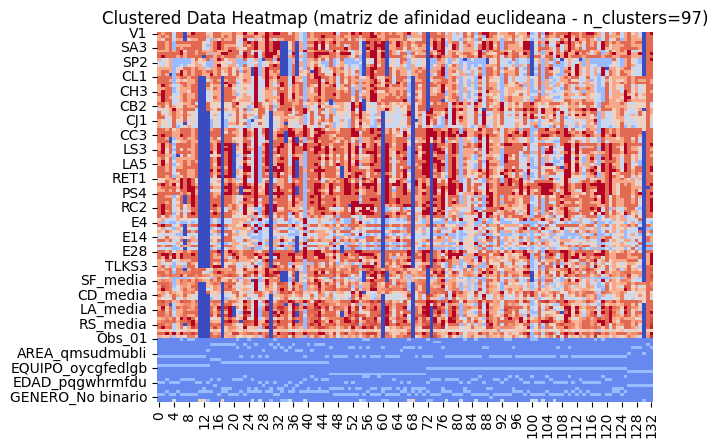

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_7

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

## B.1.2) Clustering8: matriz de afinidad RBF - discretize - n_clusters=97

In [ ]:
n_clusters = 97
spectral_clustering8 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_8 = spectral_clustering8.fit_predict(affinity_matrix_rbf)
labelsRBF_8

array([33, 12, 82, 13, 11,  0, 82, 21, 82, 13,  0, 22,  6, 27, 18, 33,  9,
       22, 53,  0, 19, 29,  0, 24, 18, 11, 39, 11,  0,  0, 27, 18,  9, 17,
       17, 16,  0,  2, 10, 28,  0, 33,  0, 30, 33, 45, 13, 25, 21, 13, 82,
        1, 16, 53,  3, 17, 13,  0,  0, 33, 27, 17, 25,  8, 25, 45, 53, 20,
       22, 21, 29,  0,  5, 15, 53,  0,  0, 49,  1, 10, 10, 11,  0,  8,  8,
        3, 25,  7, 49, 13,  0, 45,  7,  1, 21, 45, 29, 21,  8, 13, 31, 49,
        0, 49, 13,  0, 11,  8,  8,  0,  9,  8,  9,  0,  8, 13, 16, 16, 14,
       18,  1, 21, 33,  0, 29, 12,  0,  8, 25, 29,  4, 13,  0])

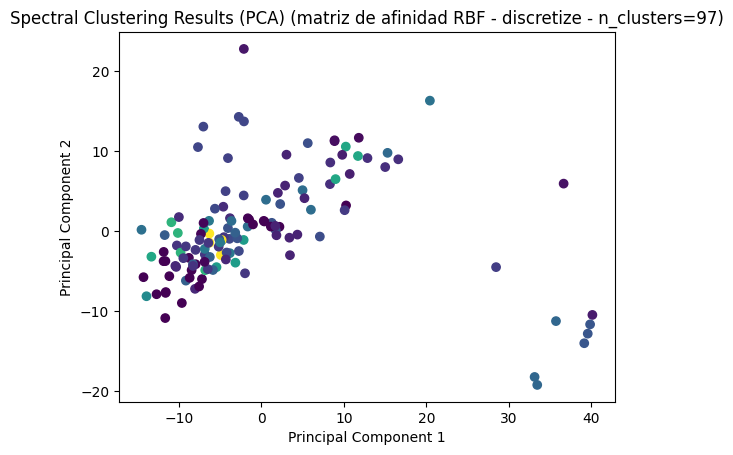

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_8)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results ( matriz de afinidad RBF - discretize - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_8)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_8)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - discretize - n_clusters=97)')
    plt.show()

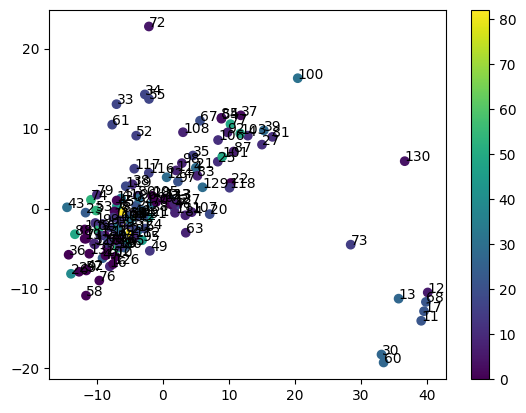

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_8)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_8):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

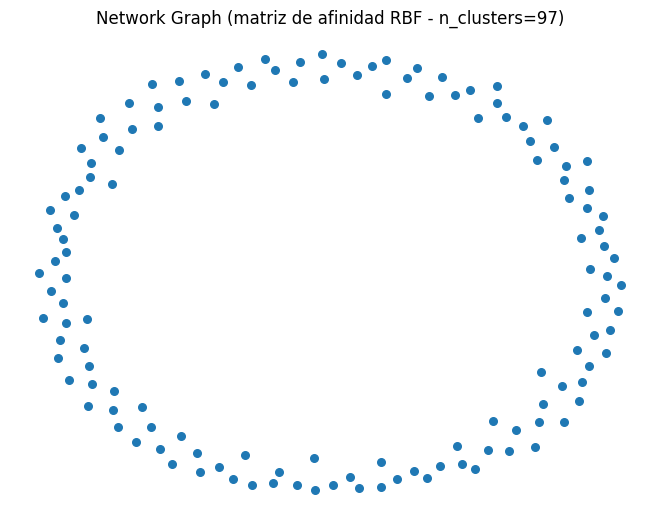

In [ ]:
# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 97

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_rbf[i, j] > umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad RBF - n_clusters=97)')
plt.show()

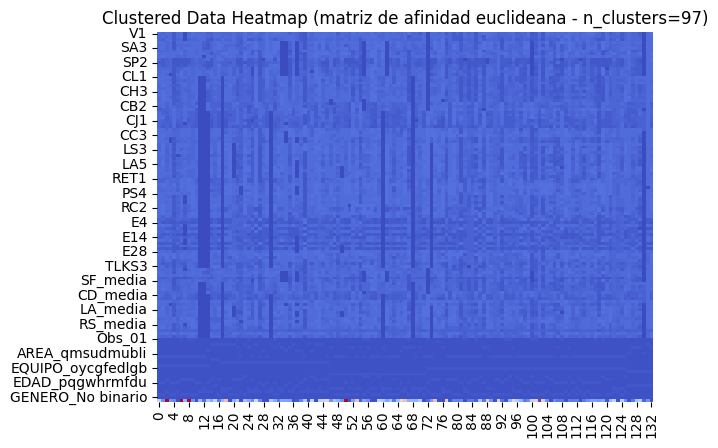

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_8

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

## B.1.3) Clustering9: matriz de afinidad RBF - discretize - n_clusters=27

In [ ]:
n_clusters = 27
spectral_clustering9 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='discretize', random_state=42)
labelsRBF_9 = spectral_clustering9.fit_predict(affinity_matrix_rbf)
labelsRBF_9

array([25, 23, 26, 26, 15,  0, 11, 17, 11, 26,  0, 10, 10, 16,  8, 25,  3,
       10,  1,  9, 11, 14,  0,  3,  8,  5, 24,  5,  0,  0, 16,  8,  3, 18,
       18, 15,  0,  0,  6,  4,  0, 25,  0,  9, 25, 23, 26, 12,  0, 26, 11,
        9, 13,  1, 15, 18, 26,  0,  0, 25, 16, 18,  0, 11, 12,  0,  1, 15,
       10, 17, 14,  0, 18, 16,  1,  3,  0,  4,  9,  6,  6,  5,  0, 11, 11,
        4, 12, 14,  4, 26,  0, 26, 15,  9, 17, 23, 14, 17,  2, 26,  5, 15,
        0,  4, 26,  0, 15, 11,  2,  4,  3, 11,  3,  0, 11, 26, 13, 13, 11,
        8,  4, 17, 25,  0, 14, 23,  0, 11, 25, 14, 16, 26,  0])

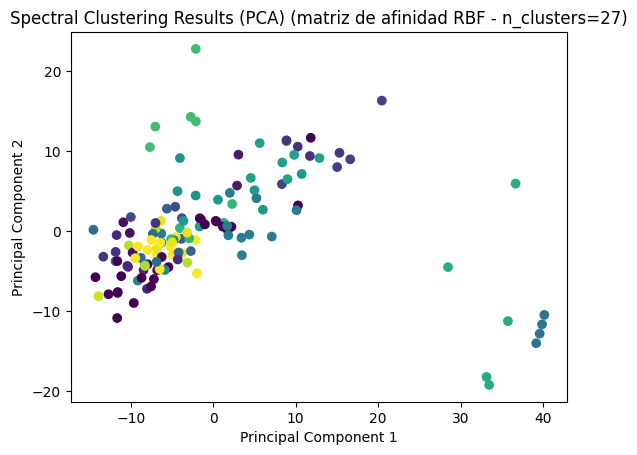

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_9)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results ( matriz de afinidad RBF - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_9)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - discretize - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_9)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - n_clusters=27)')
    plt.show()

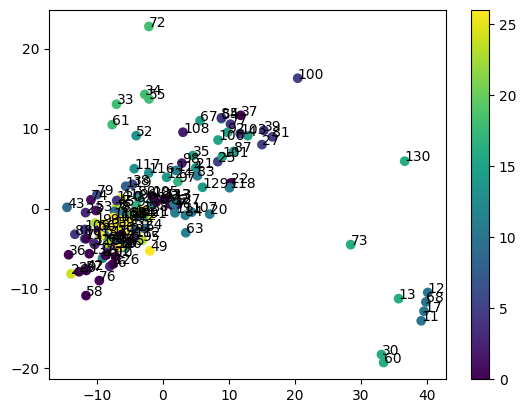

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_9)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_9):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

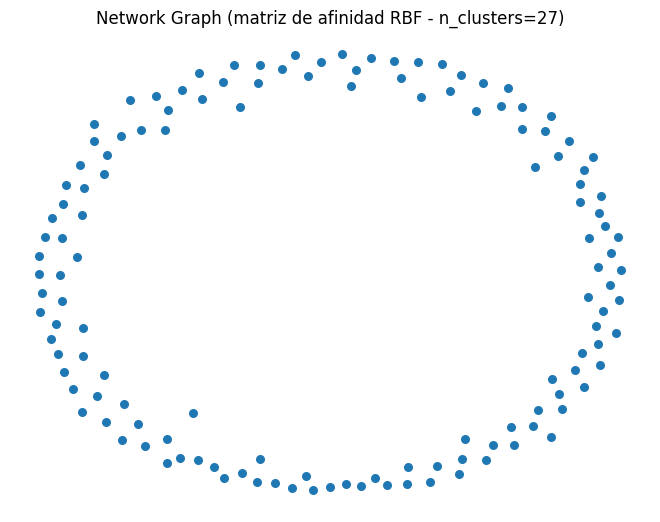

In [ ]:
# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
for i in range(len(X)):
    G.add_node(i)

umbral = 27

# Agregar aristas al grafo basadas en las conexiones entre las muestras
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if affinity_matrix_rbf[i, j] > umbral:
            G.add_edge(i, j)

# Dibujar el grafo
nx.draw(G, with_labels=False, node_size=30)
plt.title('Network Graph (matriz de afinidad RBF - n_clusters=27)')
plt.show()

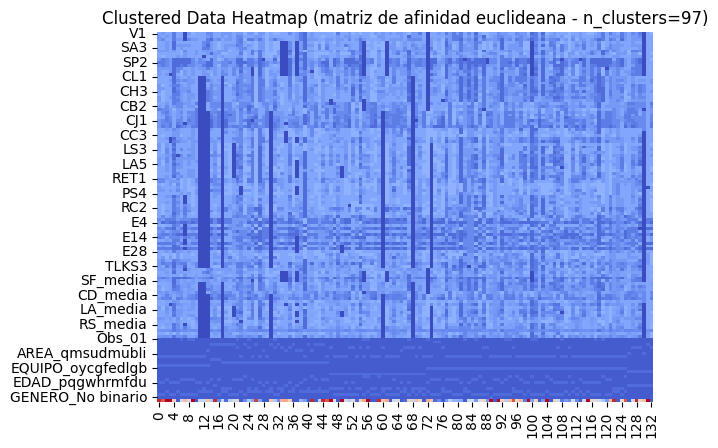

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_9

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

# B.2)  matriz de afinidad=RBF y assign_labels=kmeans

## B.2.1) Clustering10: matriz de afinidad RBF - kmeans - n_clusters=4

In [ ]:
n_clusters = 4
spectral_clustering10 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_10 = spectral_clustering10.fit_predict(affinity_matrix_rbf)
labelsRBF_10

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int32)

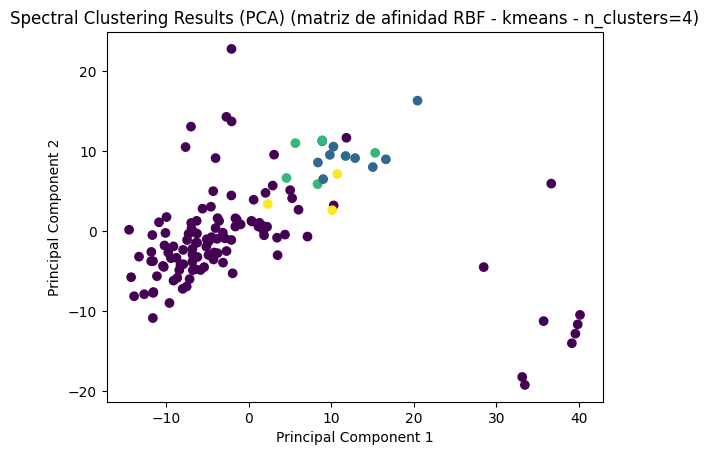

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=4)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_10)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=4)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_10)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=4)')
    plt.show()

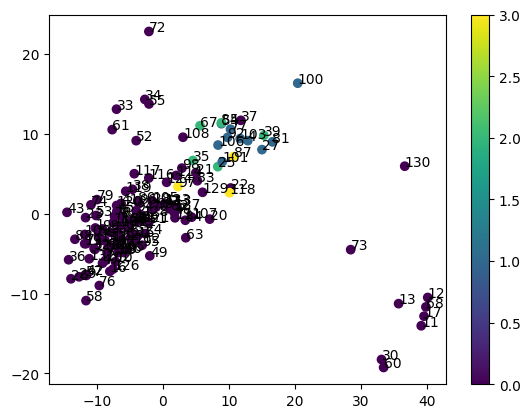

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_10)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_10):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

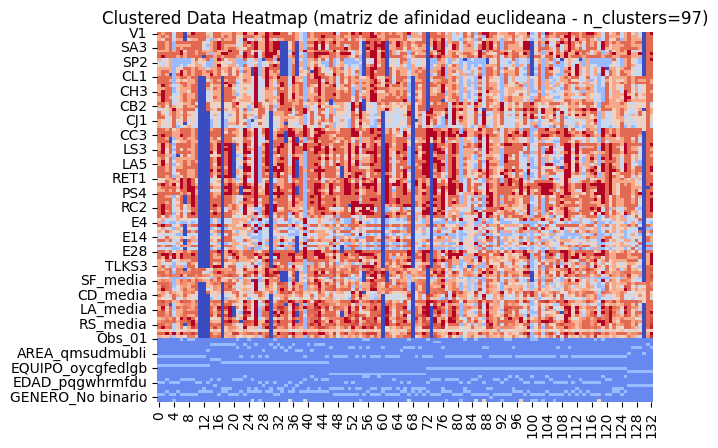

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_10

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

## B.2.2) Clustering11: matriz de afinidad RBF - kmeans - n_clusters=97

In [ ]:
n_clusters = 97
spectral_clustering11 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_11 = spectral_clustering11.fit_predict(affinity_matrix_rbf)
labelsRBF_11

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (59) found smaller than n_clusters (97). Possibly due to duplicate points in X.
  est = KMeans(


array([22, 31, 22, 38, 28, 77, 22,  8, 31, 31, 31, 22, 22, 36, 40, 31, 31,
       22, 31, 93,  6, 45, 29, 31, 22, 24, 31, 54, 31, 31, 22, 52, 22, 22,
       12, 62, 22,  2, 31,  5, 22, 31, 22, 31, 50, 31, 78, 57, 31, 15, 20,
       31, 23, 20, 14,  7, 20, 31, 75, 31, 22, 20, 22, 20, 22, 31, 38, 13,
       22, 57, 57, 22,  4,  3, 31, 31, 90, 89, 31, 87, 75, 55, 31, 76, 31,
       18, 40, 10, 75, 22, 22, 47, 21, 20, 31, 31, 38, 81, 71, 31,  9, 61,
       31, 17, 73, 25, 34, 53, 19, 88, 31, 31, 66, 31, 39, 22, 77, 59, 11,
       16, 68, 88, 22, 22, 73, 31, 22, 73, 31, 26,  1, 50, 20],
      dtype=int32)

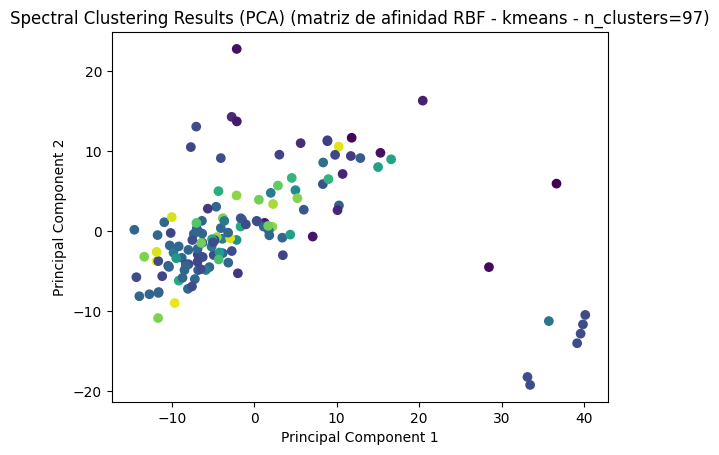

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_11)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=97)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_11)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=97)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_11)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=97)')
    plt.show()

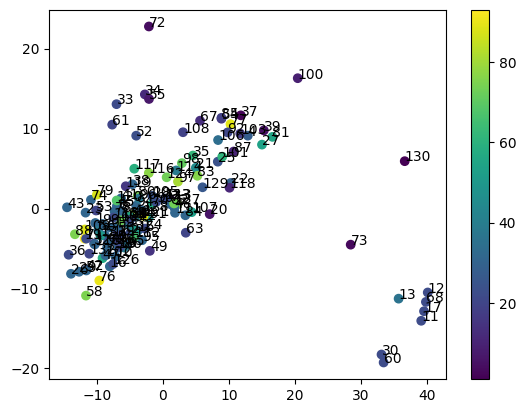

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_11)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_11):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

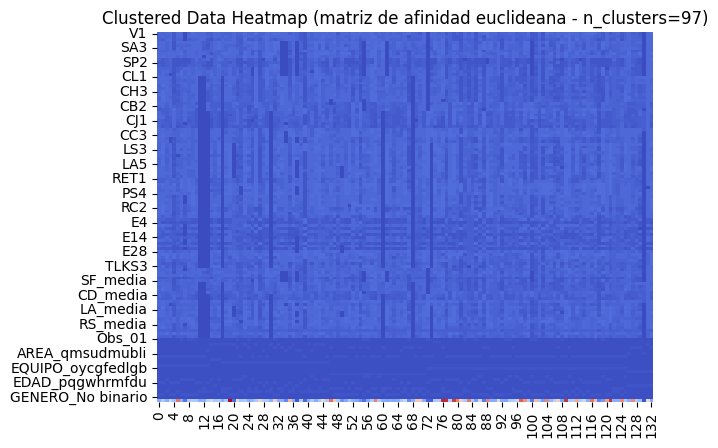

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_11

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

## B.2.3) Clustering12: matriz de afinidad RBF - kmeans - n_clusters=27

In [ ]:
n_clusters = 27
spectral_clustering12 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=42)
labelsRBF_12 = spectral_clustering12.fit_predict(affinity_matrix_rbf)
labelsRBF_12

array([ 0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0,  0,  0, 21,  0,  0,
        0,  0,  0, 11,  0, 26,  0,  0, 16,  0,  1,  0,  0,  0, 21,  0, 24,
       24, 20,  0, 25,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 17,  0, 19, 24,  0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0, 12,
        0,  0,  0,  0, 24,  0,  0,  0,  0,  9,  0,  0,  0,  8,  0,  0,  0,
        5,  0, 23,  0,  0,  0,  0,  7,  0,  0,  0,  0, 15,  6,  0, 13, 22,
        0,  4,  0,  0, 10,  0,  2,  0,  0,  0,  0,  0, 18,  0,  0,  0, 14,
       21,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int32)

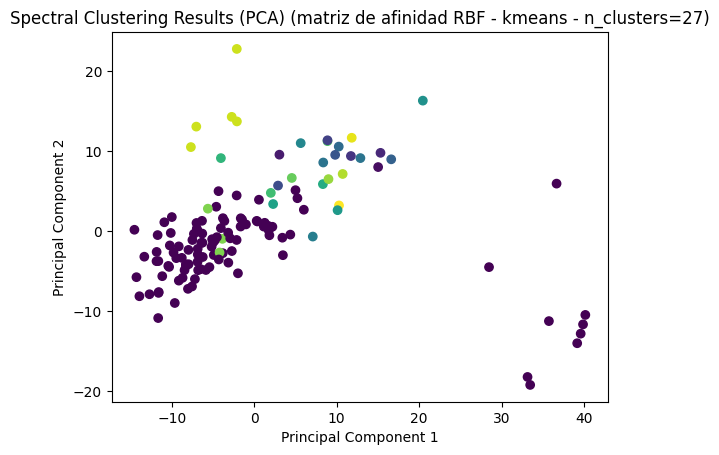

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_12)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_12)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_12)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=27)')
    plt.show()

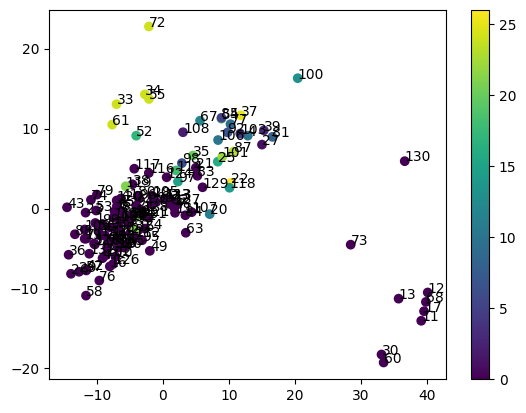

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_12)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_12):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

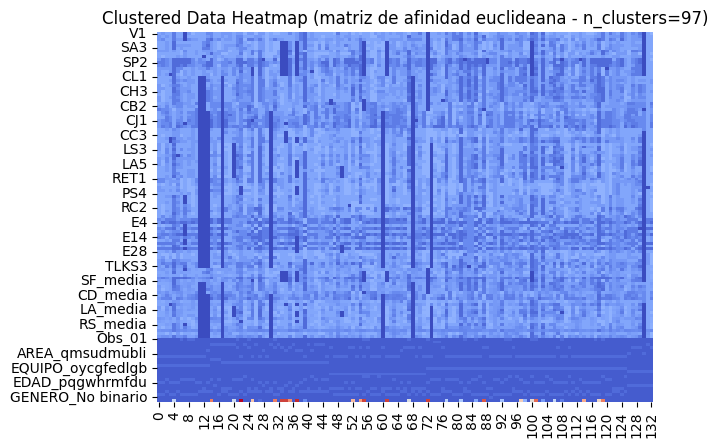

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_12

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

In [ ]:
#13.Clustering13: matriz de afinidad RBF - kmeans - n_clusters=97 random_state=2
n_clusters = 97
spectral_clustering13 = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans', random_state=2)
labelsRBF_13 = spectral_clustering13.fit_predict(affinity_matrix_rbf)
labelsRBF_13

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (54) found smaller than n_clusters (97). Possibly due to duplicate points in X.
  est = KMeans(


array([30, 30, 30, 50, 47, 36, 30,  8, 30, 30, 30, 30, 30, 30, 45, 30, 30,
       30, 30, 55,  6, 27, 25, 30, 30, 18, 89, 37, 30, 30, 30, 45, 30, 45,
       12, 88, 30,  2, 30,  5, 30, 85, 30, 30, 86, 55, 75, 30, 89, 15, 30,
       30, 29, 30, 14,  7, 30, 30, 36, 30, 30, 45, 30, 85, 30, 30, 30, 13,
       30, 87, 30, 30,  4,  3, 85, 30, 42, 22, 30, 38, 30, 33, 85, 78, 30,
       20, 85, 10, 30, 30, 30, 65, 23, 30, 30, 30, 30, 32, 21, 36,  9, 28,
       30, 17, 30, 52, 57, 26, 19, 85, 30, 30, 54, 85, 24, 30, 36, 85, 11,
       16, 55, 89, 30, 30, 34, 30, 30, 92, 30, 43,  0, 36, 36],
      dtype=int32)

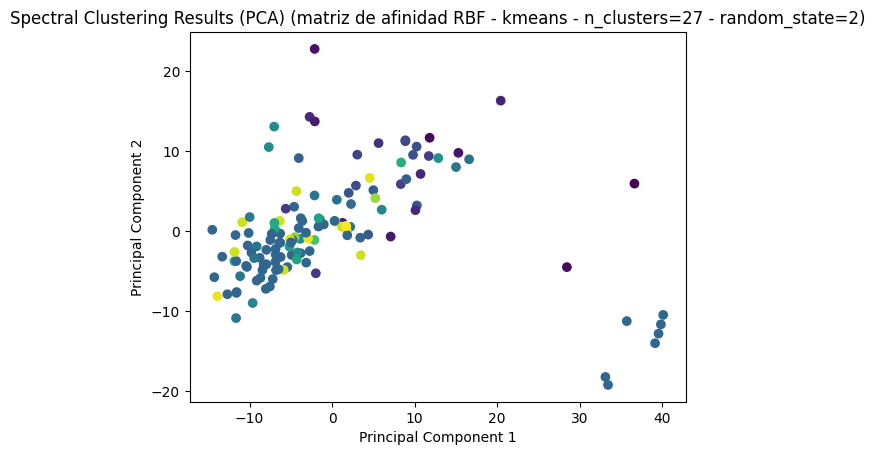

In [ ]:
# Verificar el número de características
num_features = X.shape[1]

if num_features == 2:
    # Gráfico de dispersión en 2D
    plt.scatter(X[:, 0], X[:, 1], c=labelsRBF_13)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27 - random_state=2)')
    plt.show()

elif num_features == 3:
    # Gráfico de dispersión en 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labelsRBF_13)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title('Spectral Clustering Results (matriz de afinidad RBF - kmeans - n_clusters=27 - random_state=2)')
    plt.show()

else:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_13)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Spectral Clustering Results (PCA) (matriz de afinidad RBF - kmeans - n_clusters=27 - random_state=2)')
    plt.show()

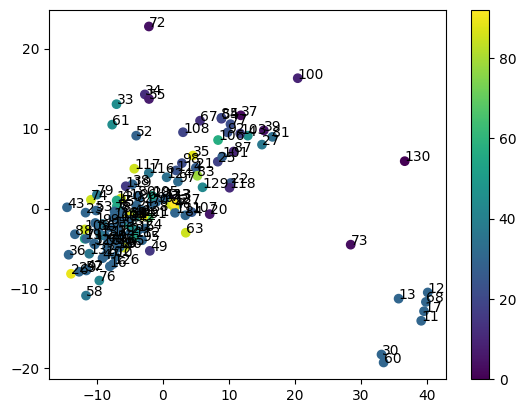

In [ ]:
# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labelsRBF_13)

# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(labelsRBF_13):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]))

# Muestra el gráfico
plt.show()

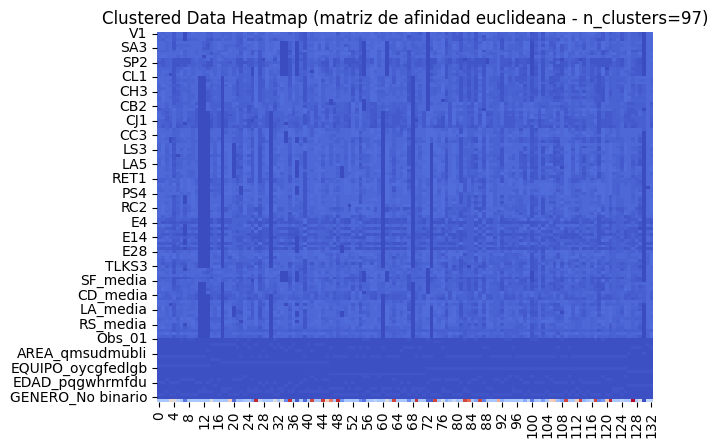

In [ ]:
#Heatmap de características

# Agregar las etiquetas de clúster a los datos procesados
data_processed['Cluster'] = labelsRBF_13

# Crear el heatmap
sns.heatmap(data_processed.T, cmap='coolwarm', cbar=False)
plt.title('Clustered Data Heatmap (matriz de afinidad euclideana - n_clusters=97)')
plt.show()

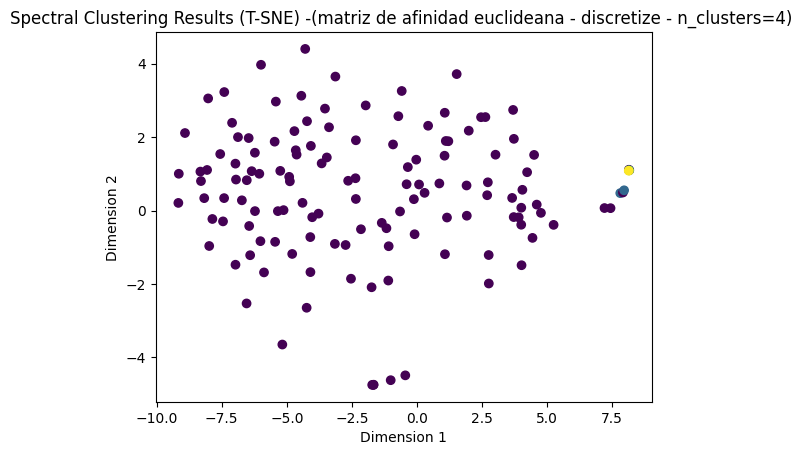

In [ ]:
#T-SNE (t-Distributed Stochastic Neighbor Embedding)

# Reducción de dimensionalidad con T-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Visualización en un gráfico de dispersión
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels1)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Spectral Clustering Results (T-SNE) -(matriz de afinidad euclideana - discretize - n_clusters=4) ')
plt.show()


# Gráfico radar
   * Si tus datos tienen características numéricas, puedes utilizar un gráfico de radar para visualizar las características promedio de cada clúster.
   * Cada clúster se representa como un polígono y la posición de los vértices del polígono corresponde a los valores promedio de las características en ese clúster.

## Gráfico radar: matriz de afinidad euclideana - discretize - n_clusters=4

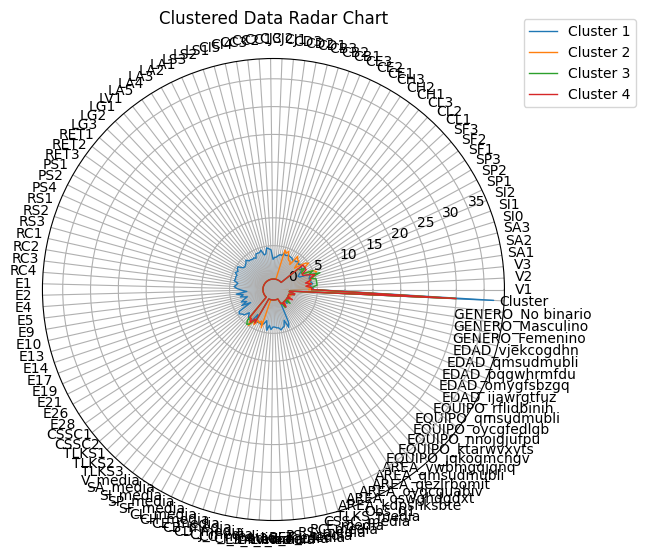

In [ ]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labels1).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()


## Gráfico radar:  matriz de afinidad euclideana - kmeans - n_clusters=4

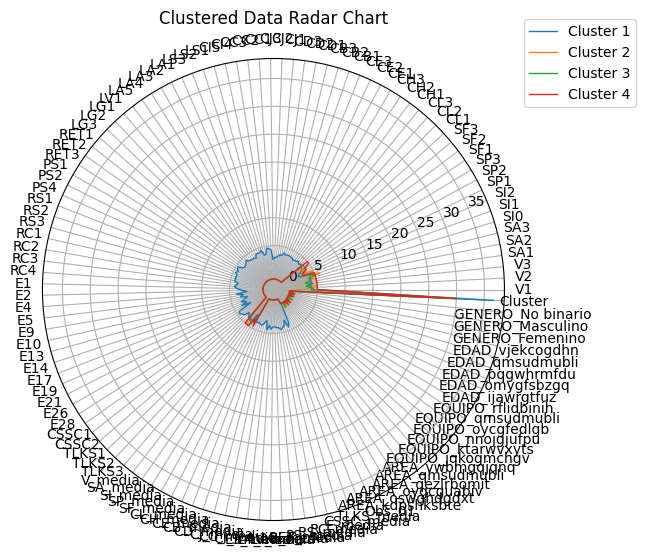

In [ ]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labels4).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()

## Gráfico radar: matriz de afinidad RBF - kmeans - n_clusters=27

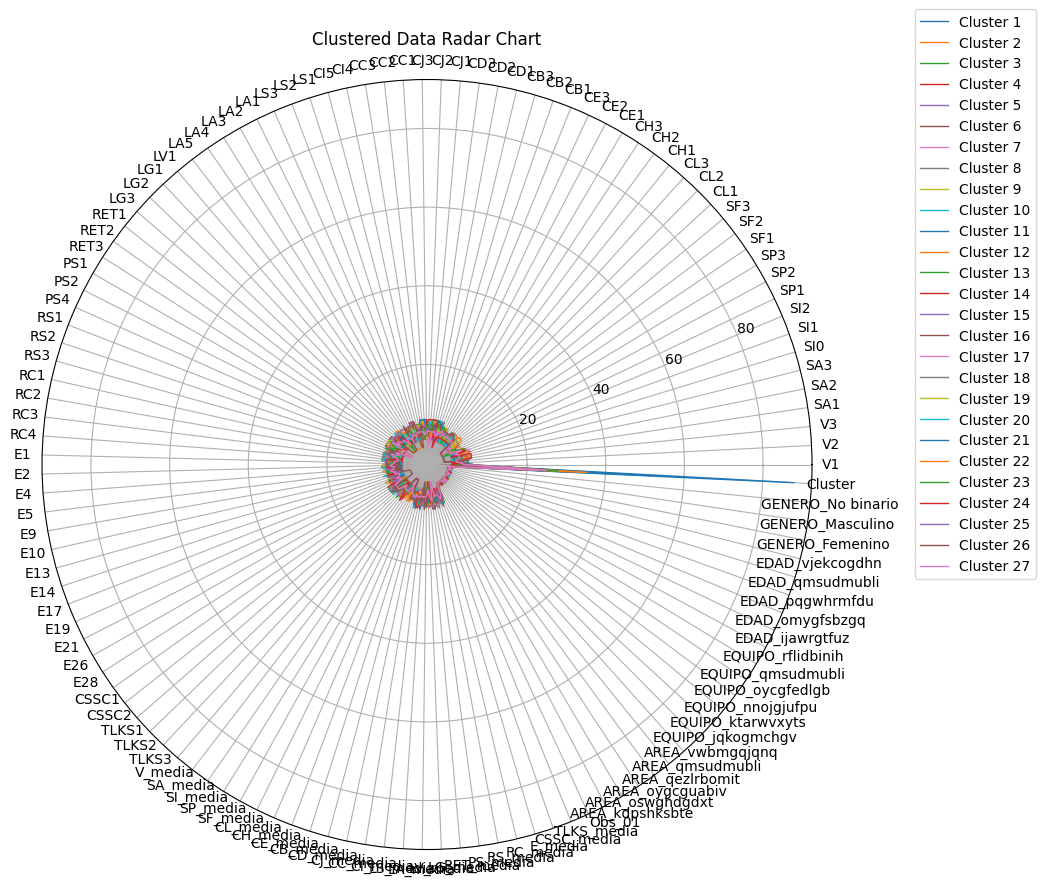

In [ ]:
# Calcular los valores promedio de las características por clúster
cluster_means = data_processed.groupby(labelsRBF_12).mean()

# Crear el gráfico de radar
categories = list(cluster_means.columns)
N = len(categories)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})
for i in range(len(cluster_means)):
    values = cluster_means.iloc[i].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, label=f'Cluster {i+1}')
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Clustered Data Radar Chart')
plt.show()